# Section 16.7

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
import numpy as np
X_train = np.concatenate((X_train, X_test))
y_train = np.concatenate((y_train, y_test))

In [5]:
X_train.shape

(70000, 28, 28)

In [6]:
y_train.shape

(70000,)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [12]:
sns.set(font_scale=2)

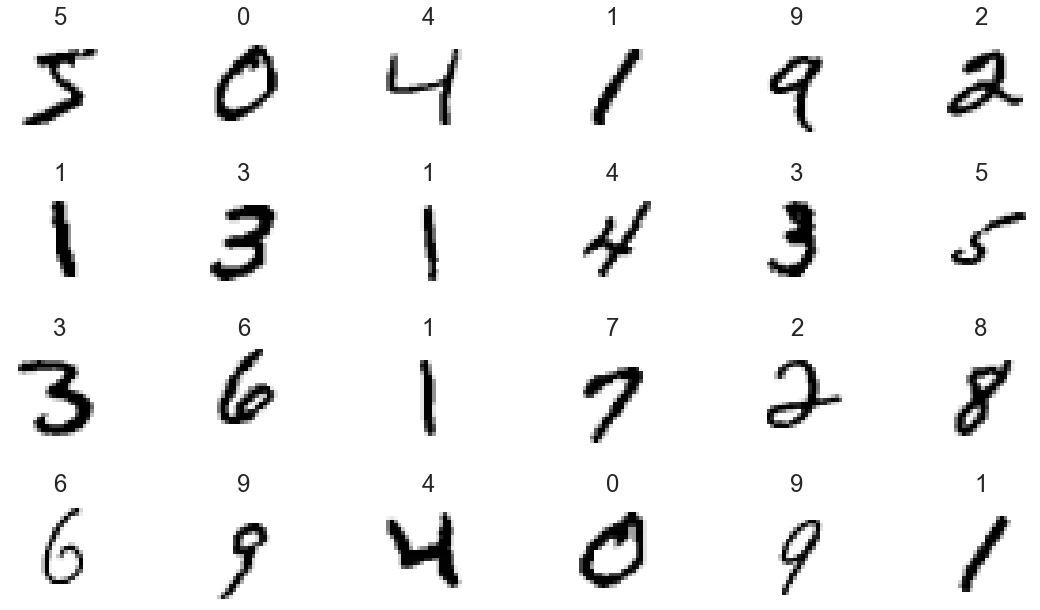

In [13]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [14]:
X_train = X_train.reshape((70000, 28, 28, 1)) 

In [15]:
X_train.shape

(70000, 28, 28, 1)

In [16]:
X_train = X_train.astype('float32') / 255

In [17]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [18]:
X_test.shape

(10000, 28, 28, 1)

In [19]:
X_test = X_test.astype('float32') / 255

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_train = to_categorical(y_train)

In [22]:
y_train.shape

(70000, 10)

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
y_test = to_categorical(y_test)

In [25]:
y_test.shape

(10000, 10)

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
cnn = Sequential()

In [28]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [29]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

In [30]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [31]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [32]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [33]:
cnn.add(Flatten())

In [34]:
cnn.add(Dense(units=128, activation='relu'))

In [35]:
cnn.add(Dense(units=10, activation='softmax'))

In [36]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

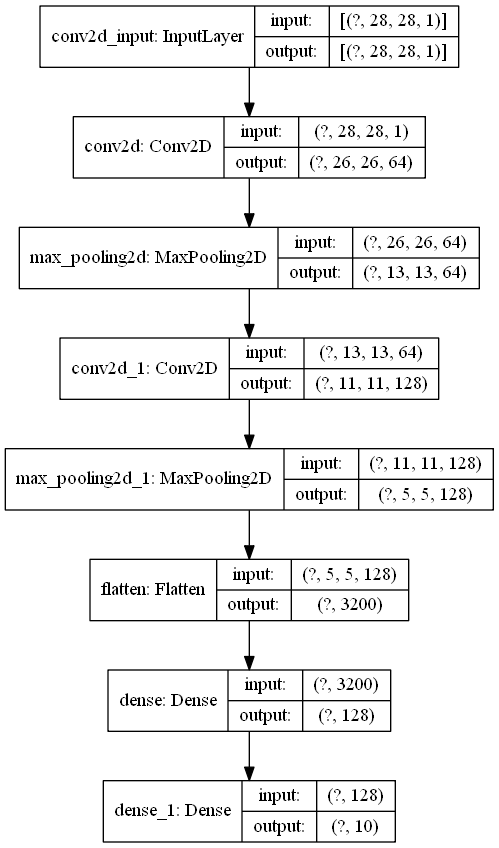

In [37]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png') 

In [38]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [39]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
985/985 [==============================] - 162s 164ms/step - loss: 0.1283 - accuracy: 0.9599 - val_loss: 0.0387 - val_accuracy: 0.9877
Epoch 2/5
985/985 [==============================] - 149s 151ms/step - loss: 0.0398 - accuracy: 0.9877 - val_loss: 0.0255 - val_accuracy: 0.9916
Epoch 3/5
985/985 [==============================] - 148s 150ms/step - loss: 0.0266 - accuracy: 0.9915 - val_loss: 0.0258 - val_accuracy: 0.9916
Epoch 4/5
985/985 [==============================] - 150s 152ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.0264 - val_accuracy: 0.9917
Epoch 5/5
985/985 [==============================] - 133s 135ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0238 - val_accuracy: 0.9933


In [40]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 10s 31ms/step - loss: 0.0210 - accuracy: 0.9933


In [41]:
loss

0.021014869213104248

In [42]:
accuracy

0.9933000206947327

In [43]:
predictions = cnn.predict(X_test)
len(predictions)

10000

In [44]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [45]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000559%
1: 0.0000000087%
2: 0.0000070618%
3: 0.0000297736%
4: 0.0000000051%
5: 0.0000000033%
6: 0.0000000000%
7: 99.9999642372%
8: 0.0000003916%
9: 0.0000002532%


In [46]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [47]:
len(incorrect_predictions)

67

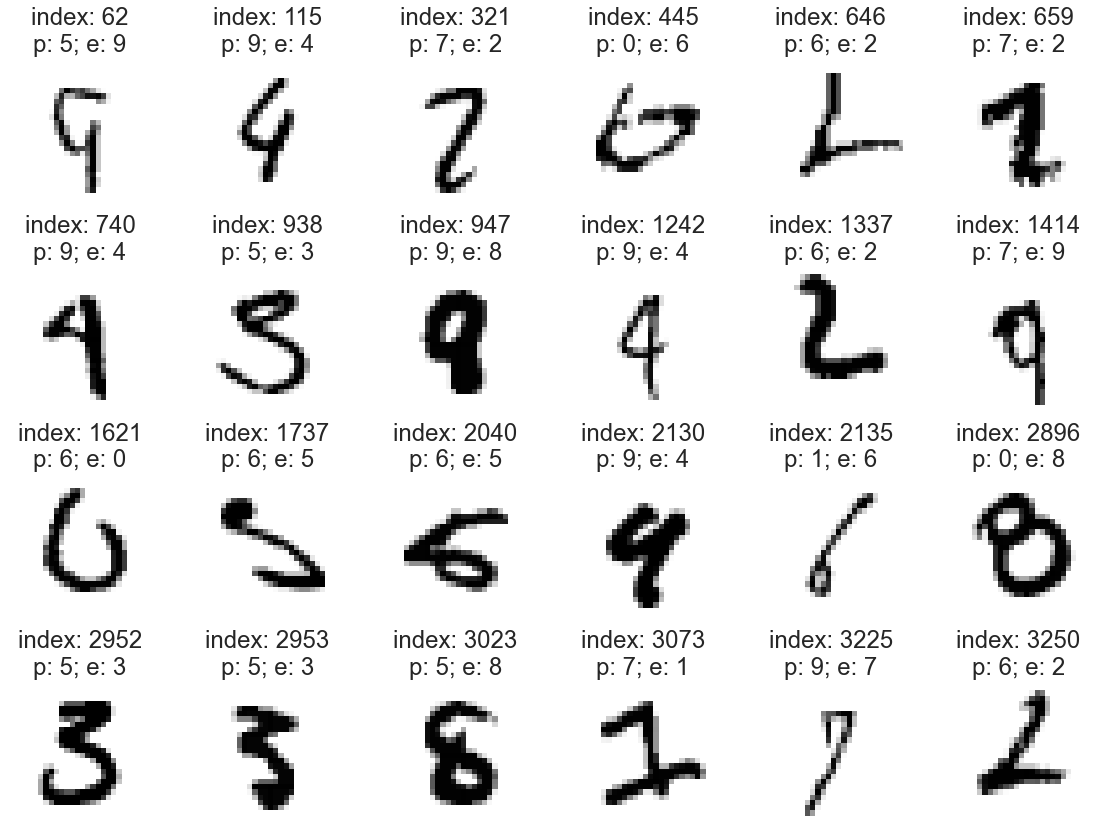

In [48]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [49]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [50]:
display_probabilities(predictions[495])

0: 0.2555598272%
1: 0.0000000495%
2: 0.0266157003%
3: 0.0001224798%
4: 0.0001491787%
5: 0.0000166447%
6: 0.7788866758%
7: 0.0000000001%
8: 98.9380598068%
9: 0.0005855775%


In [51]:
display_probabilities(predictions[583])

0: 0.0000001123%
1: 0.0000051209%
2: 97.3393321037%
3: 0.0342285435%
4: 0.0000045005%
5: 0.0000000230%
6: 0.0000000090%
7: 2.1521758288%
8: 0.4742663819%
9: 0.0000001372%


In [52]:
display_probabilities(predictions[625])

0: 0.0000274557%
1: 0.0000147299%
2: 0.0000021632%
3: 0.0000000094%
4: 0.0233425322%
5: 0.0000000907%
6: 99.9766051769%
7: 0.0000000031%
8: 0.0000005105%
9: 0.0000128739%


In [53]:
cnn.save('mnist_cnn.h5')

In [54]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################